In [4]:
# Rosenbrock: minimization wtih first or second order method
import numpy as np
# Rosenbrock function (in 2D)
def J(v):
    x = v[0]
    y = v[1]
    return 100*(y-x**2)**2+(x-1)**2
def GradJ(v):
    x = v[0]
    y = v[1]
    gradJ = np.array([200*(y-x**2)*(-2*x)+2*(x-1), 200*(y-x**2)])
    return gradJ

#Steepest descent with (or without) linesearch strategy method
def F(J, GradJ, beta, alpha_init, tau, X0, N):
    x_k = X0
    for k in range(N):
        d_k = -GradJ(x_k)
        alpha = alpha_init
        while (not(J(x_k + alpha*d_k) <= J(x_k) + alpha*beta*np.dot(d_k, GradJ(x_k)))):
            alpha *= tau
        x_k = x_k+alpha*d_k
        list_xk[k] = x_k
    return x_k


N = 10000
beta = 0.1
alpha_i = 10
tau = 0.8
X0 = np.array([-1.6,1.5])
list_xk = [0]*N

print("Minimum approximation after {} iterations with steepest descent".format(N)) 
print(F(J, GradJ, beta, alpha_i, tau, X0, N))

def HessienneJ(v):
    x = v[0]
    y = v[1]
    A = np.array([[-400*(y-3*x**2)+2, -400*x],[-400*x, 200]])
    return A

# Newton method
def F2(J, GradJ, alpha_init, X0, N):
    x_k = X0
    for k in range(N):
        d_k = -np.dot(np.linalg.inv(HessienneJ(x_k)), GradJ(x_k))
        list_xk_Newton[k] = x_k
        x_k = x_k+alpha_init*d_k
    return x_k

N_Newton = 6
alpha_i=1
print("Minimum approximation after {} iterations with Newton".format(N_Newton))
list_xk_Newton = [0]*N_Newton
print(F2(J, GradJ, alpha_i, X0, N_Newton))

Minimum approximation after 10000 iterations with steepest descent
[ 1.00060172  1.00120321]
Minimum approximation after 6 iterations with Newton
[ 1.  1.]


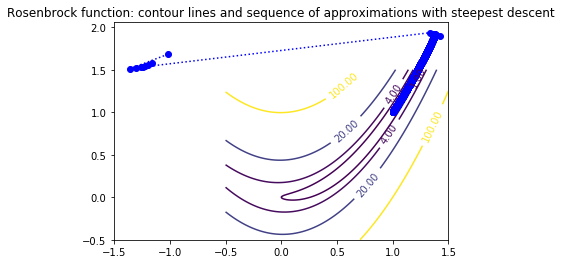

Text(0.5,1,'Rosenbrock function: contour lines and sequence of approximations with Newton')

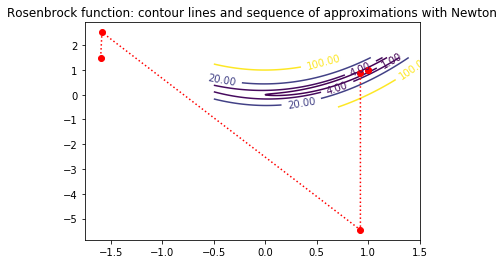

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def Rosenbrock(x,y):
    return 100*(y-x**2)**2+(x-1)**2

x, y = np.meshgrid(np.linspace(-0.5,1.5, 200), np.linspace(-0.5,1.5, 200))
z = Rosenbrock(x,y)
graphe = plt.contour(x,y,z,[1, 4,20,100])

xk_1 = [list_xk[k][0] for k in range(N)] 
xk_2 = [list_xk[k][1] for k in range(N)]
plt.plot(xk_1, xk_2, "b:o") 

plt.clabel(graphe,inline=1,fontsize=10,fmt='%3.2f')
plt.title("Rosenbrock function: contour lines and sequence of approximations with steepest descent")
plt.show()


x, y = np.meshgrid(np.linspace(-0.5,1.5, 200), np.linspace(-0.5,1.5, 200))
z = Rosenbrock(x,y)
graphe = plt.contour(x,y,z,[1, 4,20,100])

xkN_1 = [list_xk_Newton[k][0] for k in range(N_Newton)] 
xkN_2 = [list_xk_Newton[k][1] for k in range(N_Newton)]
plt.plot(xkN_1, xkN_2, "r:o") 

plt.clabel(graphe,inline=1,fontsize=10,fmt='%3.2f')
plt.title("Rosenbrock function: contour lines and sequence of approximations with Newton")
#plt.show()
